In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
sns.set()
import pylab
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score as f1
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [4]:
df=pd.read_csv("E:\\datasets\\Heart Attack Prediciton\\heart.csv")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
X=df.drop(columns='target')
Y=df['target']

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=4)

## Ada Boost Classifier

In [13]:
lm=AdaBoostClassifier()
lm.fit(x_train,y_train)

AdaBoostClassifier()

In [15]:
y_pred=lm.predict(x_test)

In [16]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [18]:
confusion_matrix(y_test,y_pred)

array([[19,  6],
       [ 4, 32]], dtype=int64)

In [19]:
f1(y_test,y_pred,average='weighted')

0.8348656033082262

In [20]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [21]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8244444444444444

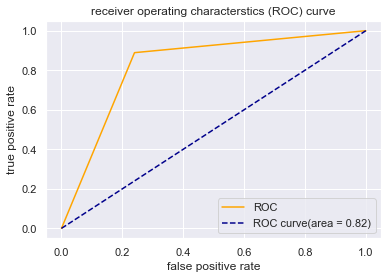

In [22]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying Gradient Boosting Classifier

In [24]:
lm=GradientBoostingClassifier()
lm.fit(x_train,y_train)

GradientBoostingClassifier()

In [25]:
y_pred=lm.predict(x_test)

In [26]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [28]:
confusion_matrix(y_test,y_pred)

array([[22,  3],
       [ 4, 32]], dtype=int64)

In [29]:
f1(y_test,y_pred)

0.9014084507042254

In [30]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [31]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8844444444444445

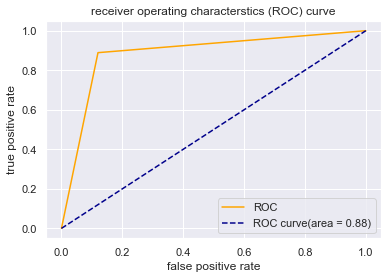

In [32]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applynig XGBoosting Classifier

In [34]:
lm=XGBClassifier()
lm.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [35]:
y_pred=lm.predict(x_test)

In [36]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [37]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [39]:
confusion_matrix(y_test,y_pred)

array([[21,  4],
       [ 3, 33]], dtype=int64)

In [40]:
f1(y_test,y_pred)

0.9041095890410958

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [42]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8783333333333333

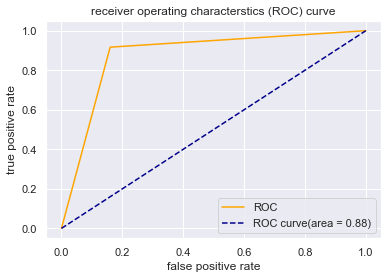

In [43]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying Cat Boosting Classifier

In [46]:
lm=CatBoostClassifier()
lm.fit(x_train,y_train)

Learning rate set to 0.005621
0:	learn: 0.6883974	total: 181ms	remaining: 3m
1:	learn: 0.6839001	total: 187ms	remaining: 1m 33s
2:	learn: 0.6799956	total: 193ms	remaining: 1m 4s
3:	learn: 0.6753966	total: 199ms	remaining: 49.5s
4:	learn: 0.6722368	total: 204ms	remaining: 40.7s
5:	learn: 0.6681069	total: 208ms	remaining: 34.5s
6:	learn: 0.6647488	total: 212ms	remaining: 30.1s
7:	learn: 0.6608332	total: 217ms	remaining: 26.9s
8:	learn: 0.6570715	total: 222ms	remaining: 24.4s
9:	learn: 0.6525281	total: 225ms	remaining: 22.3s
10:	learn: 0.6486915	total: 228ms	remaining: 20.5s
11:	learn: 0.6444228	total: 231ms	remaining: 19s
12:	learn: 0.6401775	total: 234ms	remaining: 17.8s
13:	learn: 0.6360146	total: 238ms	remaining: 16.7s
14:	learn: 0.6323138	total: 240ms	remaining: 15.8s
15:	learn: 0.6288014	total: 243ms	remaining: 14.9s
16:	learn: 0.6251721	total: 245ms	remaining: 14.2s
17:	learn: 0.6222521	total: 248ms	remaining: 13.5s
18:	learn: 0.6187435	total: 250ms	remaining: 12.9s
19:	learn: 0.61

In [47]:
y_pred=lm.predict(x_test)

In [49]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)

0.9180327868852459

In [52]:
confusion_matrix(y_test,y_pred)

array([[24,  1],
       [ 4, 32]], dtype=int64)

In [53]:
f1(y_test,y_pred)

0.927536231884058

In [54]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [55]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9244444444444444

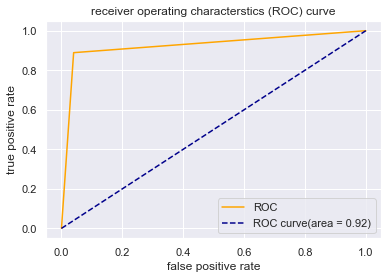

In [56]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying Light Boosting Classifier

In [58]:
lm=LGBMClassifier()
lm.fit(x_train,y_train)

LGBMClassifier()

In [59]:
y_pred=lm.predict(x_test)

In [60]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)

0.9180327868852459

In [62]:
confusion_matrix(y_test,y_pred)

array([[23,  2],
       [ 3, 33]], dtype=int64)

In [63]:
f1(y_test,y_pred)

0.9295774647887323

In [64]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [65]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9183333333333332

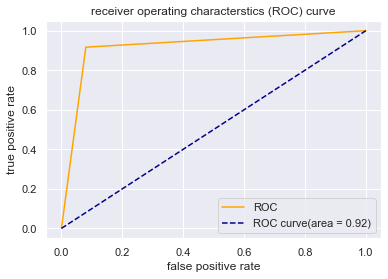

In [66]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()